In [1]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import itertools
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
import rpy2
import pingouin as pg
from datetime import date, time, datetime

/Users/zeleninam2/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# age, sex, num people bothered:
# --------> dep alone
# --------> anx alone
# --------> adhd alone
# --------> dep and anx
# --------> dep and adhd
# --------> anx and adhd
# --------> dep, anx, adhd

# 1. Load data

In [3]:
path_to_data = 'data/mydata_1general_fordescriptive.csv'
#path_to_data = 'data/mydata_1highrisk_fordescriptive.csv'

In [4]:
# load general
mydata = pd.read_csv(path_to_data)
mydata.head()

,Unnamed: 0,caseid,weight,sample_type,screener_1ongoing,screener_2impact,screener_3depression,screener_4anxiety,screener_5attention,consent,mood_yn,FNM_Q25_1,FNM_Q25_2,FNM_Q25_3,FNM_Q25_4,FNM_Q25_5,FNM_Q25_6,FNM_Q25_955,FNM_Q25_933,FNM_Q25_open1,mood_years,FNM_Q27_1,FNM_Q27_2,FNM_Q27_3,FNM_Q27_4,FNM_Q27_5,FNM_Q27_6,FNM_Q27_7,FNM_Q27_8,FNM_Q27_9,FNM_Q27_10,FNM_Q27_11,FNM_Q27_12,FNM_Q27_13,FNM_Q27_14,FNM_Q27_15,FNM_Q27_16,FNM_Q27_17,FNM_Q27_18,FNM_Q27_19,FNM_Q27_955,FNM_Q27_933,FNM_Q27_open1,mood_bothered_orig,anxiety_yn,FNM_Q30_m_1,FNM_Q30_m_2,FNM_Q30_m_3,FNM_Q30_m_4,FNM_Q30_m_5,FNM_Q30_m_6,FNM_Q30_m_7,FNM_Q30_m_8,FNM_Q30_m_955,FNM_Q30_m_933,FNM_Q30_open1,anxiety_years,FNM_Q32_1,FNM_Q32_2,FNM_Q32_3,FNM_Q32_4,FNM_Q32_5,FNM_Q32_6,FNM_Q32_7,FNM_Q32_8,FNM_Q32_9,FNM_Q32_10,FNM_Q32_955,FNM_Q32_933,FNM_Q32_open1,anxiety_bothered_orig,attention_yn,FNM_Q35_m_1,FNM_Q35_m_2,FNM_Q35_m_3,FNM_Q35_m_933,FNM_Q35_open1,attention_years,FNM_Q37_m_1,FNM_Q37_m_2,FNM_Q37_m_3,FNM_Q37_m_4,FNM_Q37_m_5,FNM_Q37_m_6,FNM_Q37_m_7,FNM_Q37_m_8,FNM_Q37_m_9,FNM_Q37_m_955,FNM_Q37_m_933,FNM_Q37_open1,attention_bothered_orig,inattention_1,inattention_2,inattention_3,inattention_4,inattention_5,inattention_6,FNM_Q1_attn,inattention_7,inattention_8,inattention_9,hyperactivity_1,hyperactivity_2,hyperactivity_3,hyperactivity_4,hyperactivity_5,impulsivity_1,impulsivity_2,impulsivity_3,impulsivity_4,sct_1,sct_2,sct_3,sct_4,sct_5,sct_6,sct_7,sct_8,sct_9,gad_1,gad_2,gad_3,gad_4,gad_5,gad_6,gad_7,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,hitop157,hitop81,hitop34,hitop54,hitop243,hitop182,hitop69,hitop89,hitop50,check_moderately,hitop129,hitop265,hitop124,hitop231,hitop93,hitop67,hitop245,hitop281,hitop141,hitop40,hitop204,hitop21,hitop236,hitop280,hitop84,hitop120,hitop77,hitop92,hitop258,hitop39,hitop254,hitop215,hitop95,hitop106,hitop283,hitop16,hitop20,hitop189,hitop1,hitop136,hitop246,hitop248,hitop257,hitop114,hitop117,hitop250,hitop200,hitop160,hitop23,hitop165,hitop244,hitop9,hitop142,hitop230,hitop149,hitop247,hitop99,hitop66,hitop240,hitop222,hitop90,hitop113,hitop278,hitop203,hitop159,hitop123,hitop275,hitop268,hitop225,hitop143,hitop151,hitop181,hitop211,hitop17,hitop126,hitop5,hitop261,hitop220,check_notatall,hitop15,hitop72,hitop140,hitop109,hitop197,hitop104,todayinattention_1,todayinattention_2,todayinattention_3,todayinattention_4,todayinattention_5,todayinattention_6,todayinattention_7,todayinattention_8,todayinattention_9,todayhyperactivity_1,todayhyperactivity_2,todayhyperactivity_3,todayhyperactivity_4,todayhyperactivity_5,todayimpulsivity_1,todayimpulsivity_2,todayimpulsivity_3,todayimpulsivity_4,todaysct_1,todaysct_2,todaysct_3,todaysct_4,todaysct_5,todaysct_6,todaysct_7,todaysct_8,todaysct_9,today_na1,todaygad_1,todaygad_2,todaygad_3,...,hitop257_recontact,hitop114_recontact,hitop117_recontact,hitop250_recontact,hitop200_recontact,hitop160_recontact,hitop23_recontact,hitop165_recontact,hitop244_recontact,hitop9_recontact,hitop142_recontact,hitop230_recontact,hitop149_recontact,hitop247_recontact,hitop99_recontact,hitop66_recontact,hitop240_recontact,hitop222_recontact,hitop90_recontact,hitop113_recontact,hitop278_recontact,hitop203_recontact,hitop159_recontact,hitop123_recontact,hitop275_recontact,hitop268_recontact,hitop225_recontact,hitop143_recontact,hitop151_recontact,hitop181_recontact,hitop211_recontact,hitop17_recontact,hitop126_recontact,hitop5_recontact,hitop261_recontact,hitop220_recontact,check_notatall_recontact,hitop15_recontact,hitop72_recontact,hitop140_recontact,hitop109_recontact,hitop197_recontact,hitop104_recontact,todayinattention_1_recontact,todayinattention_2_recontact,todayinattention_3_recontact,todayinattention_4_recontact,todayinattention_5_recontact,todayinattention_6_recontact,todayinattention_7_recontact,todayinattention_8_recontact,todayinattention_9_recontact,todayhyperactivity_1_recontact,todayhyperactivity_2_recontact,todayhyperactivity_3_recontact,todayhyperactivity_4_recontact,todayhyperactivity_5_recontact,to

In [5]:
for col in mydata.columns:
    print(col)

Unnamed: 0
caseid
weight
sample_type
screener_1ongoing
screener_2impact
screener_3depression
screener_4anxiety
screener_5attention
consent
mood_yn
FNM_Q25_1
FNM_Q25_2
FNM_Q25_3
FNM_Q25_4
FNM_Q25_5
FNM_Q25_6
FNM_Q25_955
FNM_Q25_933
FNM_Q25_open1
mood_years
FNM_Q27_1
FNM_Q27_2
FNM_Q27_3
FNM_Q27_4
FNM_Q27_5
FNM_Q27_6
FNM_Q27_7
FNM_Q27_8
FNM_Q27_9
FNM_Q27_10
FNM_Q27_11
FNM_Q27_12
FNM_Q27_13
FNM_Q27_14
FNM_Q27_15
FNM_Q27_16
FNM_Q27_17
FNM_Q27_18
FNM_Q27_19
FNM_Q27_955
FNM_Q27_933
FNM_Q27_open1
mood_bothered_orig
anxiety_yn
FNM_Q30_m_1
FNM_Q30_m_2
FNM_Q30_m_3
FNM_Q30_m_4
FNM_Q30_m_5
FNM_Q30_m_6
FNM_Q30_m_7
FNM_Q30_m_8
FNM_Q30_m_955
FNM_Q30_m_933
FNM_Q30_open1
anxiety_years
FNM_Q32_1
FNM_Q32_2
FNM_Q32_3
FNM_Q32_4
FNM_Q32_5
FNM_Q32_6
FNM_Q32_7
FNM_Q32_8
FNM_Q32_9
FNM_Q32_10
FNM_Q32_955
FNM_Q32_933
FNM_Q32_open1
anxiety_bothered_orig
attention_yn
FNM_Q35_m_1
FNM_Q35_m_2
FNM_Q35_m_3
FNM_Q35_m_933
FNM_Q35_open1
attention_years
FNM_Q37_m_1
FNM_Q37_m_2
FNM_Q37_m_3
FNM_Q37_m_4
FNM_Q37_m_5
FNM_Q37_m_

In [6]:
for col in mydata.columns:
    if "bothered" in col:
        print(col)

mood_bothered_orig
anxiety_bothered_orig
attention_bothered_orig
mood_bothered_recontact_orig
anxiety_bothered_recontact_orig
attention_bothered_recontact_orig
mood_bothered
mood_bothered_recontact
anxiety_bothered
anxiety_bothered_recontact
attention_bothered
attention_bothered_recontact
moodanxiety_bothered
moodanxiety_bothered_recontact


In [7]:
good_columns = ['sex','birthyr','starttime','endtime','mood_bothered', 'anxiety_bothered','attention_bothered', 'mood_bothered_recontact', 'anxiety_bothered_recontact','attention_bothered_recontact']

In [8]:
(mydata.mood_bothered | mydata.anxiety_bothered | mydata.attention_bothered).sum()

120

In [9]:
(mydata.mood_bothered_recontact | mydata.anxiety_bothered_recontact | mydata.attention_bothered_recontact).sum()

109

## GENERAL - SEX

In [10]:
mydata.sex.value_counts()
# 1 -- Male
# 2 -- Female

sex
2    266
1    231
Name: count, dtype: int64

In [11]:
mydata.loc[mydata['sex'] == 1, 'mysex'] = 'Male'
mydata.loc[mydata['sex'] == 2, 'mysex'] = 'Female'
mydata.loc[mydata['sex'] == 3, 'mysex'] = 'Other'

In [12]:
mydata.mysex.value_counts()

mysex
Female    266
Male      231
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13ac22310>,
 [Text(0.604635166924746, 0.9189212778676336, 'Male'),
  Text(-0.6327374531930289, -0.8998018200286103, 'Female'),
  Text(1.0994748690885738, -0.03398547105254541, 'Other')],
 [Text(0.3298010001407705, 0.5012297879278, '31.5%'),
  Text(-0.3451295199234703, -0.4908009927428783, '67.5%'),
  Text(0.5997135649574039, -0.018537529665024765, '1.0%')])

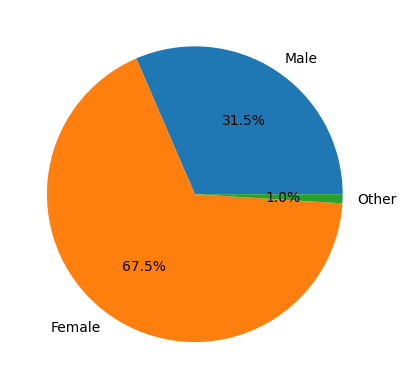

In [13]:
fig, ax = plt.subplots()
ax.pie([96, 206, 3], labels=['Male','Female', 'Other'], autopct='%1.1f%%')

## GENERAL - AGE

In [14]:
mydata.birthyr.value_counts().sort_index()

birthyr
1932.0     1
1933.0     1
1935.0     1
1936.0     1
1938.0     1
1939.0     1
1940.0     3
1941.0     1
1942.0     3
1943.0     2
1944.0     2
1945.0     1
1946.0     3
1947.0     5
1948.0     8
1949.0    11
1950.0     5
1951.0     2
1952.0    14
1953.0    12
1954.0    19
1955.0     9
1956.0     7
1957.0     8
1958.0    11
1959.0    13
1960.0     5
1961.0     9
1962.0    10
1963.0    11
1964.0    17
1965.0    13
1966.0    13
1967.0     6
1968.0     6
1969.0    10
1970.0    10
1971.0     9
1972.0     9
1973.0     7
1974.0     8
1975.0     5
1976.0     5
1977.0     4
1978.0     8
1979.0     7
1980.0    11
1981.0     8
1982.0     9
1983.0     6
1984.0     2
1985.0    13
1986.0    10
1987.0     6
1988.0     7
1989.0     6
1990.0     7
1991.0     4
1992.0    11
1993.0     9
1994.0     9
1995.0     7
1996.0     6
1997.0     6
1998.0     3
1999.0     7
2000.0    11
2001.0     6
2002.0     1
2003.0     4
2004.0     6
2005.0     5
Name: count, dtype: int64

In [15]:
age_data = mydata.birthyr.value_counts()

In [16]:
age_data = age_data.reset_index()
age_data.columns = ['birthyear', 'counts']
age_data.head()

,birthyear,counts
0,1954.0,19
1,1964.0,17
2,1952.0,14
3,1985.0,13
4,1965.0,13


<BarContainer object of 72 artists>

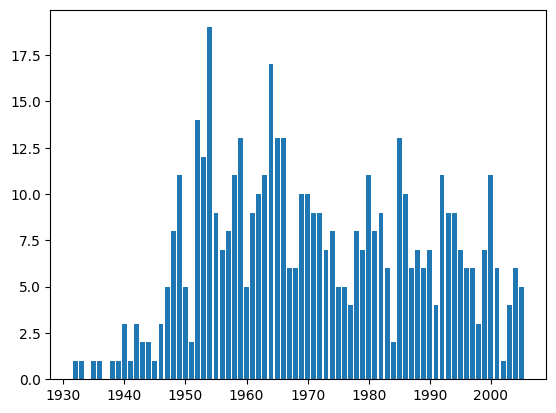

In [17]:
plt.bar(age_data.birthyear, age_data.counts)

In [18]:
age_data['approx_age'] = 2023 - age_data['birthyear']
age_data.head()

,birthyear,counts,approx_age
0,1954.0,19,69.0
1,1964.0,17,59.0
2,1952.0,14,71.0
3,1985.0,13,38.0
4,1965.0,13,58.0


<BarContainer object of 72 artists>

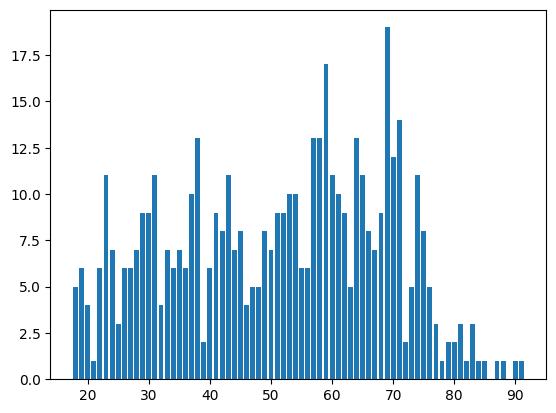

In [19]:
plt.bar(age_data.approx_age, age_data.counts)

In [20]:
age_data.approx_age.value_counts().sort_index()

approx_age
18.0    1
19.0    1
20.0    1
21.0    1
22.0    1
23.0    1
24.0    1
25.0    1
26.0    1
27.0    1
28.0    1
29.0    1
30.0    1
31.0    1
32.0    1
33.0    1
34.0    1
35.0    1
36.0    1
37.0    1
38.0    1
39.0    1
40.0    1
41.0    1
42.0    1
43.0    1
44.0    1
45.0    1
46.0    1
47.0    1
48.0    1
49.0    1
50.0    1
51.0    1
52.0    1
53.0    1
54.0    1
55.0    1
56.0    1
57.0    1
58.0    1
59.0    1
60.0    1
61.0    1
62.0    1
63.0    1
64.0    1
65.0    1
66.0    1
67.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.0    1
74.0    1
75.0    1
76.0    1
77.0    1
78.0    1
79.0    1
80.0    1
81.0    1
82.0    1
83.0    1
84.0    1
85.0    1
87.0    1
88.0    1
90.0    1
91.0    1
Name: count, dtype: int64

## GENERAL - DIAGNOSES

In [21]:
# num people bothered:
# --------> dep alone
# --------> anx alone
# --------> adhd alone
# --------> dep and anx
# --------> dep and adhd
# --------> anx and adhd
# --------> dep, anx, adhd

In [22]:
mydata.mood_bothered.value_counts()

mood_bothered
False    497
Name: count, dtype: int64

In [23]:
mydata.mood_bothered_recontact.value_counts()

mood_bothered_recontact
False    419
True      78
Name: count, dtype: int64

In [24]:
mydata.anxiety_bothered.value_counts()

anxiety_bothered
False    387
True     110
Name: count, dtype: int64

In [25]:
mydata.anxiety_bothered_recontact.value_counts()

anxiety_bothered_recontact
False    419
True      78
Name: count, dtype: int64

In [26]:
mydata.attention_bothered.value_counts()

attention_bothered
False    464
True      33
Name: count, dtype: int64

In [27]:
mydata.attention_bothered_recontact.value_counts()

attention_bothered_recontact
False    474
True      23
Name: count, dtype: int64

In [28]:
mydata['moodanxiety_bothered'] = mydata.mood_bothered | mydata.anxiety_bothered
mydata['moodanxiety_bothered_recontact'] = mydata.mood_bothered_recontact | mydata.anxiety_bothered_recontact
mydata['attentionanxiety_bothered'] = mydata.attention_bothered | mydata.anxiety_bothered
mydata['attentionanxiety_bothered_recontact'] = mydata.attention_bothered_recontact | mydata.anxiety_bothered_recontact
mydata['moodattention_bothered'] = mydata.mood_bothered | mydata.attention_bothered
mydata['moodattention_bothered_recontact'] = mydata.mood_bothered_recontact | mydata.attention_bothered_recontact
mydata['moodattentionanxiety_bothered'] = mydata.mood_bothered | mydata.anxiety_bothered | mydata.attention_bothered
mydata['moodattentionanxiety_bothered_recontact'] = mydata.mood_bothered_recontact | mydata.anxiety_bothered_recontact | mydata.attention_bothered_recontact

In [29]:
mydata.moodanxiety_bothered.value_counts()

moodanxiety_bothered
False    387
True     110
Name: count, dtype: int64

In [30]:
mydata.moodanxiety_bothered_recontact.value_counts()

moodanxiety_bothered_recontact
False    394
True     103
Name: count, dtype: int64

In [31]:
mydata.attentionanxiety_bothered.value_counts()

attentionanxiety_bothered
False    377
True     120
Name: count, dtype: int64

In [32]:
mydata.attentionanxiety_bothered_recontact.value_counts()

attentionanxiety_bothered_recontact
False    410
True      87
Name: count, dtype: int64

In [33]:
mydata.moodattention_bothered.value_counts()

moodattention_bothered
False    464
True      33
Name: count, dtype: int64

In [34]:
mydata.moodattention_bothered_recontact.value_counts()

moodattention_bothered_recontact
False    411
True      86
Name: count, dtype: int64

In [35]:
mydata.moodattentionanxiety_bothered.value_counts()

moodattentionanxiety_bothered
False    377
True     120
Name: count, dtype: int64

In [36]:
mydata.moodattentionanxiety_bothered_recontact.value_counts()

moodattentionanxiety_bothered_recontact
False    388
True     109
Name: count, dtype: int64

In [37]:
mydata['moodYES_anxNO_attntNO'] =  mydata.mood_bothered & ~mydata.anxiety_bothered & ~mydata.attention_bothered
mydata['moodNO_anxYES_attntNO'] = ~mydata.mood_bothered & mydata.anxiety_bothered & ~mydata.attention_bothered
mydata['moodNO_anxNO_attntYES'] = ~mydata.mood_bothered & ~mydata.anxiety_bothered & mydata.attention_bothered
mydata['moodYES_anxYES_attntNO'] = mydata.mood_bothered & mydata.anxiety_bothered & ~mydata.attention_bothered
mydata['moodYES_anxNO_attntYES'] = mydata.mood_bothered & ~mydata.anxiety_bothered & mydata.attention_bothered
mydata['moodNO_anxYES_attntYES'] = ~mydata.mood_bothered & mydata.anxiety_bothered & mydata.attention_bothered
mydata['moodYES_anxYES_attntYES'] = mydata.mood_bothered & mydata.anxiety_bothered & mydata.attention_bothered

mydata['moodYES_anxNO_attntNO_recontact'] =  mydata.mood_bothered_recontact & ~mydata.anxiety_bothered_recontact & ~mydata.attention_bothered_recontact
mydata['moodNO_anxYES_attntNO_recontact'] = ~mydata.mood_bothered_recontact & mydata.anxiety_bothered_recontact & ~mydata.attention_bothered_recontact
mydata['moodNO_anxNO_attntYES_recontact'] = ~mydata.mood_bothered_recontact & ~mydata.anxiety_bothered_recontact & mydata.attention_bothered_recontact
mydata['moodYES_anxYES_attntNO_recontact'] = mydata.mood_bothered_recontact & mydata.anxiety_bothered_recontact & ~mydata.attention_bothered_recontact
mydata['moodYES_anxNO_attntYES_recontact'] = mydata.mood_bothered_recontact & ~mydata.anxiety_bothered_recontact & mydata.attention_bothered_recontact
mydata['moodNO_anxYES_attntYES_recontact'] = ~mydata.mood_bothered_recontact & mydata.anxiety_bothered_recontact & mydata.attention_bothered_recontact
mydata['moodYES_anxYES_attntYES_recontact'] = mydata.mood_bothered_recontact & mydata.anxiety_bothered_recontact & mydata.attention_bothered_recontact

In [38]:
#mydata.loc[:,['mood_bothered', 'anxiety_bothered', 'attention_bothered', 'moodYES_anxNO_attntNO', 'moodYES_anxYES_attntNO', 'moodYES_anxYES_attntYES']].head(50)

In [39]:
print(mydata.moodYES_anxNO_attntNO.value_counts())

moodYES_anxNO_attntNO
False    497
Name: count, dtype: int64


In [40]:
print(mydata.moodYES_anxNO_attntNO.value_counts())
print('\n')
print(mydata.moodNO_anxYES_attntNO.value_counts())
print('\n')
print(mydata.moodNO_anxNO_attntYES.value_counts())
print('\n')
print(mydata.moodYES_anxYES_attntNO.value_counts())
print('\n')
print(mydata.moodYES_anxNO_attntYES.value_counts())
print('\n')
print(mydata.moodNO_anxYES_attntYES.value_counts())
print('\n')
print(mydata.moodYES_anxYES_attntYES.value_counts())
print('\n')

print(mydata.moodYES_anxNO_attntNO_recontact.value_counts())
print('\n')
print(mydata.moodNO_anxYES_attntNO_recontact.value_counts())
print('\n')
print(mydata.moodNO_anxNO_attntYES_recontact.value_counts())
print('\n')
print(mydata.moodYES_anxYES_attntNO_recontact.value_counts())
print('\n')
print(mydata.moodYES_anxNO_attntYES_recontact.value_counts())
print('\n')
print(mydata.moodNO_anxYES_attntYES_recontact.value_counts())
print('\n')
print(mydata.moodYES_anxYES_attntYES_recontact.value_counts())
print('\n')

moodYES_anxNO_attntNO
False    497
Name: count, dtype: int64


moodNO_anxYES_attntNO
False    410
True      87
Name: count, dtype: int64


moodNO_anxNO_attntYES
False    487
True      10
Name: count, dtype: int64


moodYES_anxYES_attntNO
False    497
Name: count, dtype: int64


moodYES_anxNO_attntYES
False    497
Name: count, dtype: int64


moodNO_anxYES_attntYES
False    474
True      23
Name: count, dtype: int64


moodYES_anxYES_attntYES
False    497
Name: count, dtype: int64


moodYES_anxNO_attntNO_recontact
False    475
True      22
Name: count, dtype: int64


moodNO_anxYES_attntNO_recontact
False    474
True      23
Name: count, dtype: int64


moodNO_anxNO_attntYES_recontact
False    491
True       6
Name: count, dtype: int64


moodYES_anxYES_attntNO_recontact
False    456
True      41
Name: count, dtype: int64


moodYES_anxNO_attntYES_recontact
False    494
True       3
Name: count, dtype: int64


moodNO_anxYES_attntYES_recontact
False    495
True       2
Name: count, dtype: int6

In [41]:
# TIMES BETWEEN SESSIONS

In [205]:
time_str = mydata.loc[0,'starttime']
time_str = time_str[:10]
time_initial = date.fromisoformat(time_str)
time_str = mydata.loc[0,'starttime_recontact']
time_str = time_str[:10]
time_recontact = date.fromisoformat(time_str)

In [206]:
time_recontact - time_initial

datetime.timedelta(days=7)

In [207]:
def get_delta_time(x):
    start = x['starttime']
    recontact = x['starttime_recontact']
    if start != 'No Data' and recontact != 'No Data':
        time_start = start[:10]
        time_initial = date.fromisoformat(time_start)
        time_recontact = recontact[:10]
        time_recontact = date.fromisoformat(time_recontact)    
        return time_recontact - time_initial
    else:
        return np.nan

mydata['deltatime'] = mydata.apply(get_delta_time, axis=1)
#mydata['time_between_sessions'] = mydata.apply(lambda x: get_delta_time(x.starttime, x.starttime_recontact), axis=1)

In [208]:
mydata.deltatime.value_counts()

deltatime
7 days     99
8 days     70
9 days     23
12 days    13
10 days    12
11 days    12
13 days    10
14 days     6
17 days     5
18 days     2
16 days     2
19 days     1
20 days     1
15 days     1
Name: count, dtype: int64

In [209]:
mydata.deltatime.mean()

Timedelta('8 days 21:45:31.517509727')